In [1]:
import os
os.chdir("../../test_data/system_tests/sensitivity_tests/Spectronaut_LargeFC/")

In [2]:
import os

input_file = "20210210_154121_S209-S-1-240min_Reportv2.tsv"
samplemap_file = "samples.map.tsv"
results_dir = "results"
results_dir_housekeeping_protnormed = "results_houskeeping_protnormed"
results_dir_no_norm = "results_nonorm"
protein_subset_for_normalization_file="human_proteins.tsv"

spectronaut_file = "MP-LFC-OT.xlsx"
alphaquant_file = "./results_houskeeping_protnormed/S1_VS_S2.results.tsv"
mapping_file = "20210210_154121_S209-S-1-240min_Report.annotation.tsv" #"20210210_154121_S209-S-1-240min_Report.tsv"


run_diffanalysis = False

run_diffanalysis_nonorm = False

run_diffanalysis_housekeeping_protnormed = True

print(os.path.abspath("."))

housekeeping_genes = "housekeeping_genes.tsv"
housekeeping_proteins = "housekeeping_proteins.tsv"


/Users/constantin/workspace/alphaquant/test_data/system_tests/sensitivity_tests/Spectronaut_LargeFC


In [3]:
if run_diffanalysis:
    import alphaquant.diff_analysis_manager as diffmgr

    diffmgr.run_pipeline(input_file=input_file, samplemap_file=samplemap_file, results_dir=results_dir, runtime_plots=True)

using input type spectronaut_fragion_isotopes_protein
removed pre existing /Users/constantin/workspace/alphaquant/test_data/system_tests/sensitivity_tests/Spectronaut_LargeFC/20210210_154121_S209-S-1-240min_Reportv2.tsv.ml_info_table.tsv
start processeing condpair ('S1', 'S2')
normalized within conditions
without missingvals (if applicable)
complete dataset
shift comparison by -0.12376974800960028
normalized between conditions
t_ion2nonan_sw 2.87369704246521
t_intensity_selection 30.141077995300293
t_ion2nonan_sw 3.0064170360565186
t_intensity_selection 30.478847980499268
checked 0 of 1166655 ions
checked 2000 of 1166655 ions
checked 4000 of 1166655 ions
checked 6000 of 1166655 ions
checked 8000 of 1166655 ions
checked 10000 of 1166655 ions
checked 12000 of 1166655 ions
checked 14000 of 1166655 ions
checked 16000 of 1166655 ions
checked 18000 of 1166655 ions
checked 20000 of 1166655 ions
checked 22000 of 1166655 ions
checked 24000 of 1166655 ions
checked 26000 of 1166655 ions
checked 2

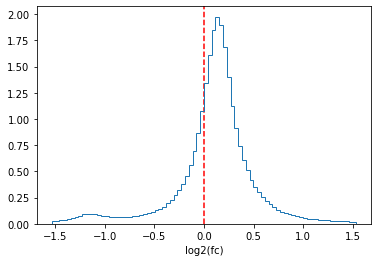

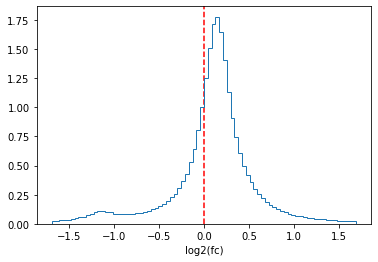

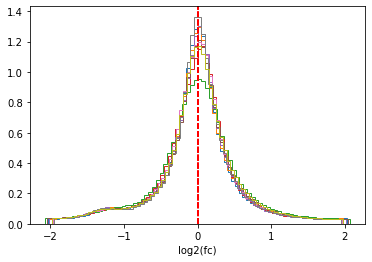

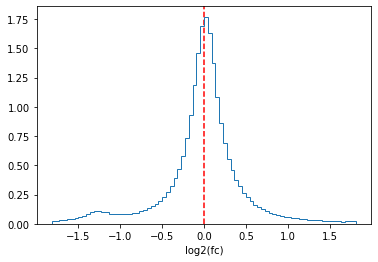

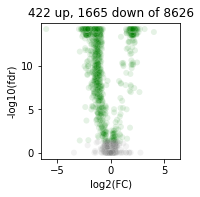

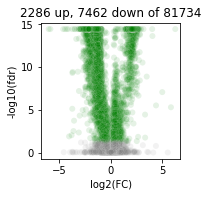

In [4]:
if run_diffanalysis_housekeeping_protnormed:
    import alphaquant.run_pipeline as run_pipeline

    run_pipeline.run_pipeline(input_file=input_file, samplemap_file=samplemap_file, results_dir=results_dir_housekeeping_protnormed, runtime_plots=True, protein_subset_for_normalization_file=housekeeping_proteins, 
                              write_out_results_tree=True, annotation_columns=["PG.Organisms"], input_type_to_use="spectronaut_fragion_isotopes_protein")

In [5]:
if run_diffanalysis_nonorm:
    import alphaquant.diff_analysis_manager as diffmgr
    print(os.path.abspath("."))
    diffmgr.run_pipeline(input_file=input_file, samplemap_file=samplemap_file, results_dir=results_dir_no_norm, runtime_plots=True, normalize=True, use_iontree_if_possible=False)

In [6]:
import pandas as pd
annotation_file = "20210210_154121_S209-S-1-240min_Reportv2.annotation.tsv"
annoation_df = pd.read_csv(annotation_file, sep='\t').rename(columns={"PG.Organisms": "organism"})
df_alphaquant = pd.read_csv(alphaquant_file, sep='\t')[["protein", "log2fc", "fdr", "quality_score", "total_intensity"]].merge(annoation_df, on="protein", how="inner")
#df_alphaquant = pd.read_csv(alphaquant_file, sep='\t')[["protein", "log2fc", "fdr", "quality_score", "PG.Organisms", "total_intensity"]].rename(columns={"PG.Organisms": "organism"})
display(df_alphaquant)

df_spectronaut = pd.read_excel(spectronaut_file, sheet_name=2)[["Protein", "log2FC", "adjusted.pvalue"]].rename(columns={"Protein" : "protein", "log2FC" : "log2fc", "adjusted.pvalue" : "fdr"})

df_combined = df_alphaquant.merge(df_spectronaut, on="protein", how="inner", suffixes=("_alphaquant", "_spectronaut"))
df_combined["intensity_alphaquant"] = df_combined["total_intensity"]
df_combined["intensity_spectronaut"] = df_combined["total_intensity"]
df_combined = df_combined.drop(columns=["total_intensity"])

display(df_combined)

,protein,log2fc,fdr,quality_score,total_intensity,organism
0,P22061;P22061-2,0.019958,9.995474e-01,0.053671,9.983319e+07,Homo sapiens
1,P53252,2.017504,5.871138e-15,0.011148,1.961871e+07,Saccharomyces cerevisiae (strain ATCC 204508 /...
2,P25205,0.054349,9.995474e-01,0.168471,4.437241e+08,Homo sapiens
3,Q9GZH5,-1.177069,1.253566e-14,0.013155,1.205033e+07,Caenorhabditis elegans
4,Q5VZK9;Q5VZK9-2,-0.044255,9.995474e-01,0.037295,1.251507e+07,Homo sapiens
...,...,...,...,...,...,...
8621,O18218;O62486,-1.273821,3.639588e-07,0.001240,3.921998e+05,Caenorhabditis elegans
8622,P0A9R7,-1.666573,1.630971e-10,0.000503,3.257548e+05,Escherichia coli (strain K12)
8623,Q8ND90,0.043131,9.995474e-01,0.001173,9.304780e+03,Homo sapiens
8624,Q8IY31;Q8IY31-2;Q8IY31-3;Q8IY31-4,0.482167,1.889162e-01,0.001441,1.578631e+05,Homo sapiens


,protein,log2fc_alphaquant,fdr_alphaquant,quality_score,organism,log2fc_spectronaut,fdr_spectronaut,intensity_alphaquant,intensity_spectronaut
0,P22061;P22061-2,0.019958,9.995474e-01,0.053671,Homo sapiens,0.116802,0.199409,9.983319e+07,9.983319e+07
1,P53252,2.017504,5.871138e-15,0.011148,Saccharomyces cerevisiae (strain ATCC 204508 /...,2.165821,0.000066,1.961871e+07,1.961871e+07
2,P25205,0.054349,9.995474e-01,0.168471,Homo sapiens,0.073509,0.182423,4.437241e+08,4.437241e+08
3,Q9GZH5,-1.177069,1.253566e-14,0.013155,Caenorhabditis elegans,-1.141497,0.000171,1.205033e+07,1.205033e+07
4,Q5VZK9;Q5VZK9-2,-0.044255,9.995474e-01,0.037295,Homo sapiens,0.073089,0.466740,1.251507e+07,1.251507e+07
...,...,...,...,...,...,...,...,...,...
7848,Q14697-2,0.184599,6.994257e-01,0.002513,Homo sapiens,0.063630,0.162498,3.399246e+06,3.399246e+06
7849,P34703,-0.091860,9.995474e-01,0.001954,Caenorhabditis elegans,-0.018739,0.905667,2.002073e+06,2.002073e+06
7850,P0A9R7,-1.666573,1.630971e-10,0.000503,Escherichia coli (strain K12),-1.792998,0.001234,3.257548e+05,3.257548e+05
7851,Q8IY31;Q8IY31-2;Q8IY31-3;Q8IY31-4,0.482167,1.889162e-01,0.001441,Homo sapiens,0.718320,0.128774,1.578631e+05,1.578631e+05


,organism,hits_alphaquant,max_hits_alphaquant,allowed_decoy_hits_alphaquant,hits_spectronaut,max_hits_spectronaut,allowed_decoy_hits_spectronaut
0,Caenorhabditis elegans,927,1001,NaN,909,1001,NaN
1,Escherichia coli (strain K12),373,389,NaN,370,389,NaN
2,Homo sapiens,54,0,89.0,191,0,96.0
3,Saccharomyces cerevisiae (strain ATCC 204508 /...,353,389,NaN,356,389,NaN


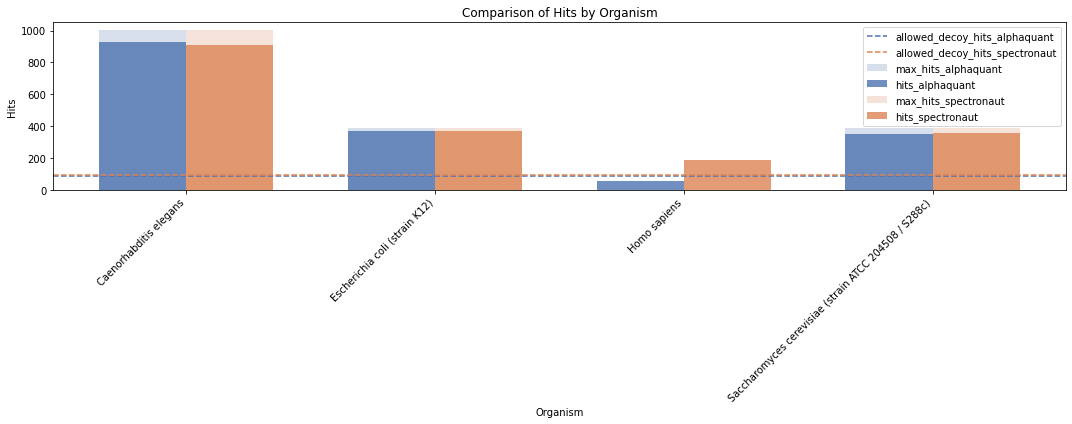

In [7]:
import alphaquant.benchm.sensitivity as aq_benchm_sensititivy
classification_benchmark = aq_benchm_sensititivy.RatioClassificationTableGenerator(df_combined, decoy_organism="Homo sapiens")
classification_df = classification_benchmark.per_species_results_df
display(classification_df)
ax = aq_benchm_sensititivy.plot_sighits_barplot(classification_benchmark.per_species_results_df, ['_alphaquant', '_spectronaut'], 'Homo sapiens')



In [13]:
def assert_fdr_is_not_violated(classification_df, suffix = "_alphaquant",  decoy_organism="Homo sapiens"):
    idx_of_decoy_organism = classification_df[classification_df["organism"] == decoy_organism].index
    num_allowed_hits = classification_df.loc[idx_of_decoy_organism, f"allowed_decoy_hits{suffix}"].values[0]
    num_allowed_hits_w_tolerance = int(1.1*num_allowed_hits)
    num_actual_hits =  classification_df.loc[idx_of_decoy_organism,f"hits{suffix}"].values[0]

    assert num_actual_hits < num_allowed_hits_w_tolerance , "more false postives than expected"


def assert_sensitivity_is_as_expected(classification_df, suffix = "_alphaquant",  decoy_organism="Homo sapiens"):
    idx_of_organisms_of_interest = classification_df[classification_df["organism"] != decoy_organism].index
    for idx_elem in idx_of_organisms_of_interest:
        max_num_hits = classification_df.loc[idx_elem, f"max_hits{suffix}"]
        actual_hits =  classification_df.loc[idx_elem, f"hits{suffix}"]

        assert actual_hits*1.15 > max_num_hits, "sensitivity lower than expected"


assert_fdr_is_not_violated(classification_df)
assert_sensitivity_is_as_expected(classification_df)

In [ ]:
%reload_ext autoreload
%autoreload 2

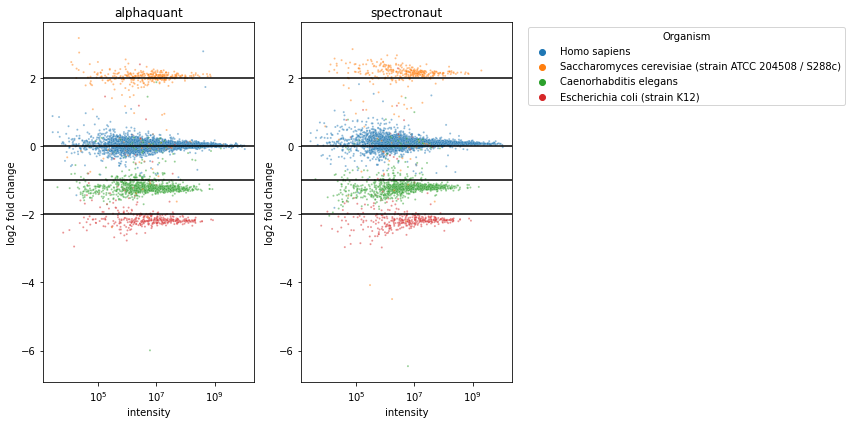

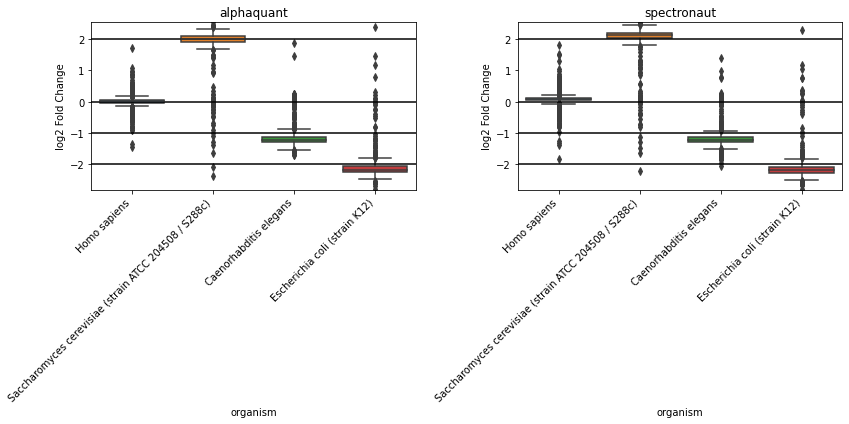

In [10]:
import alphaquant.benchm.ratios as aq_benchm_ratios

scatter_plotter = aq_benchm_ratios.MixedSpeciesScatterPlotter(df_combined=df_combined, method_suffixes=["_alphaquant", "_spectronaut"], expected_log2fcs=[-2, -1,0,  2], figure_size=[6, 6])
aq_benchm_ratios.MixedSpeciesBoxPlotter(df_combined=df_combined, method_suffixes=["_alphaquant", "_spectronaut"], expected_log2fcs=[-2, -1,0,  2], figure_size=[6, 6])




7853

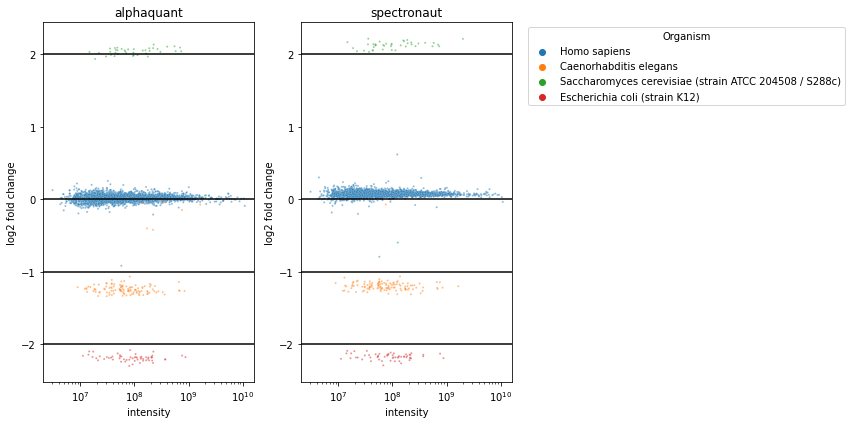

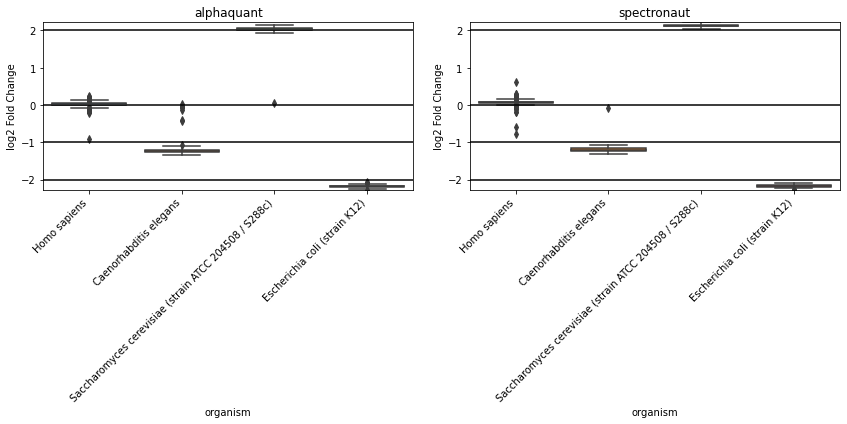

In [11]:
import alphaquant.benchm.ratios as aq_benchm_ratios

display(len(df_combined.index))
df_combined_shortened = df_combined.sort_values(by= "quality_score", ascending=False).head(3000)

scatter_plotter = aq_benchm_ratios.MixedSpeciesScatterPlotter(df_combined=df_combined_shortened, method_suffixes=["_alphaquant", "_spectronaut"], expected_log2fcs=[-2, -1,0,  2], figure_size=[6, 6])
aq_benchm_ratios.MixedSpeciesBoxPlotter(df_combined=df_combined_shortened, method_suffixes=["_alphaquant", "_spectronaut"], expected_log2fcs=[-2, -1,0,  2], figure_size=[6, 6])




In [12]:
import plotly.express as px
import pandas as pd

class MixedSpeciesScatterPlotterInteractive:
    """
    Plots interactive LFQ-bench style plots from a standardized input table using plotly for interactivity.
    Hovering over points will display protein names among other details.
    """
    def __init__(self, df_combined, method_suffixes, expected_log2fcs):
        self._df_combined = df_combined
        self._method_suffixes = method_suffixes
        self._expected_log2fcs = expected_log2fcs
        self.figures = []

        self._plot_fc_scatter_per_method()

    def _plot_fc_scatter_per_method(self):
        for method_idx, suffix in enumerate(self._method_suffixes):
            self._plot_fc_scatter(method_idx, suffix)

    def _plot_fc_scatter(self, method_idx, suffix):
        intensity_column = f'intensity{suffix}'
        log2fc_column = f'log2fc{suffix}'
        organism_column = 'organism'
        protein_column = 'protein'

        fig = px.scatter(self._df_combined, x=intensity_column, y=log2fc_column, color=organism_column,
                          hover_data=[protein_column], log_x=True, title=suffix[1:],
                          labels={"x": "Intensity", "y": "Log2 Fold Change"},
                          opacity=0.5, size_max=60)

        # Add expected_log2fc lines
        for expected_log2fc in self._expected_log2fcs:
            fig.add_hline(y=expected_log2fc, line_dash="dash", line_color="black")

        self.figures.append(fig)
        print("scatter plotted")

    def show_figures(self):
        for fig in self.figures:
            fig.show()


scatter_plotter_interactive = MixedSpeciesScatterPlotterInteractive(df_combined=df_combined, method_suffixes=["_alphaquant", "_spectronaut"], expected_log2fcs=[-2, -1,0,  2])
scatter_plotter_interactive.show_figures()

scatter plotted
scatter plotted


In [ ]:
df_combined["fcdiff"] = abs(df_combined["log2fc_alphaquant"] - df_combined["log2fc_spectronaut"])
df_combined = df_combined.sort_values(by="fcdiff", ascending=False)
display(df_combined.head(100))

df_combined.to_csv("/tmp/combined.tsv", sep='\t', index=False)


,protein,log2fc_alphaquant,fdr_alphaquant,quality_score,organism,log2fc_spectronaut,fdr_spectronaut,intensity_alphaquant,intensity_spectronaut,fcdiff
5408,P14020,2.031126,1.256574e-14,0.005923,Saccharomyces cerevisiae (strain ATCC 204508 /...,-4.487363,0.000926,1.943899e+05,1.943899e+05,6.518489
6220,P16547,1.997210,8.852422e-15,0.004852,Saccharomyces cerevisiae (strain ATCC 204508 /...,-0.436231,0.280315,2.964701e+05,2.964701e+05,2.433441
5897,P02992,0.102594,1.919536e-01,0.010704,Saccharomyces cerevisiae (strain ATCC 204508 /...,2.327680,0.001032,3.564050e+06,3.564050e+06,2.225085
5880,P09424,0.050581,9.992719e-01,0.002355,Escherichia coli (strain K12),-2.160160,0.000239,6.428792e+05,6.428792e+05,2.210740
2538,P22202,0.045923,7.393989e-01,0.047012,Saccharomyces cerevisiae (strain ATCC 204508 /...,2.215493,0.000107,4.803271e+06,4.803271e+06,2.169570
...,...,...,...,...,...,...,...,...,...,...
2178,P25553,-1.018831,1.778292e-08,0.004282,Escherichia coli (strain K12),-1.710456,0.001178,2.152600e+05,2.152600e+05,0.691626
2512,P0AD49,-1.601499,5.768716e-15,0.007207,Escherichia coli (strain K12),-2.292433,0.001140,1.343447e+05,1.343447e+05,0.690933
2946,P04425,-2.570838,4.998505e-15,0.005459,Escherichia coli (strain K12),-1.884416,0.004647,1.017816e+05,1.017816e+05,0.686423
6182,P00931,1.706725,4.339043e-15,0.002248,Saccharomyces cerevisiae (strain ATCC 204508 /...,2.390766,0.001800,1.692111e+05,1.692111e+05,0.684041


In [ ]:
import alphaquant.plotting.fcviz as aq_fcviz
import alphaquant.plotting.tree_and_fc_viz as aq_tree_and_fc_viz
import alphaquant.plotting.base_functions as aq_base_functions
import alphaquant.utils.utils as aq_utils



quantification_info = aq_fcviz.CondpairQuantificationInfo(("S1", "S2"), results_dir_housekeeping_protnormed, samplemap_file)

#load the trees containing the tree-based quantification info
condpair_tree = aq_utils.read_condpair_tree("S1", "S2", results_folder=results_dir_housekeeping_protnormed)


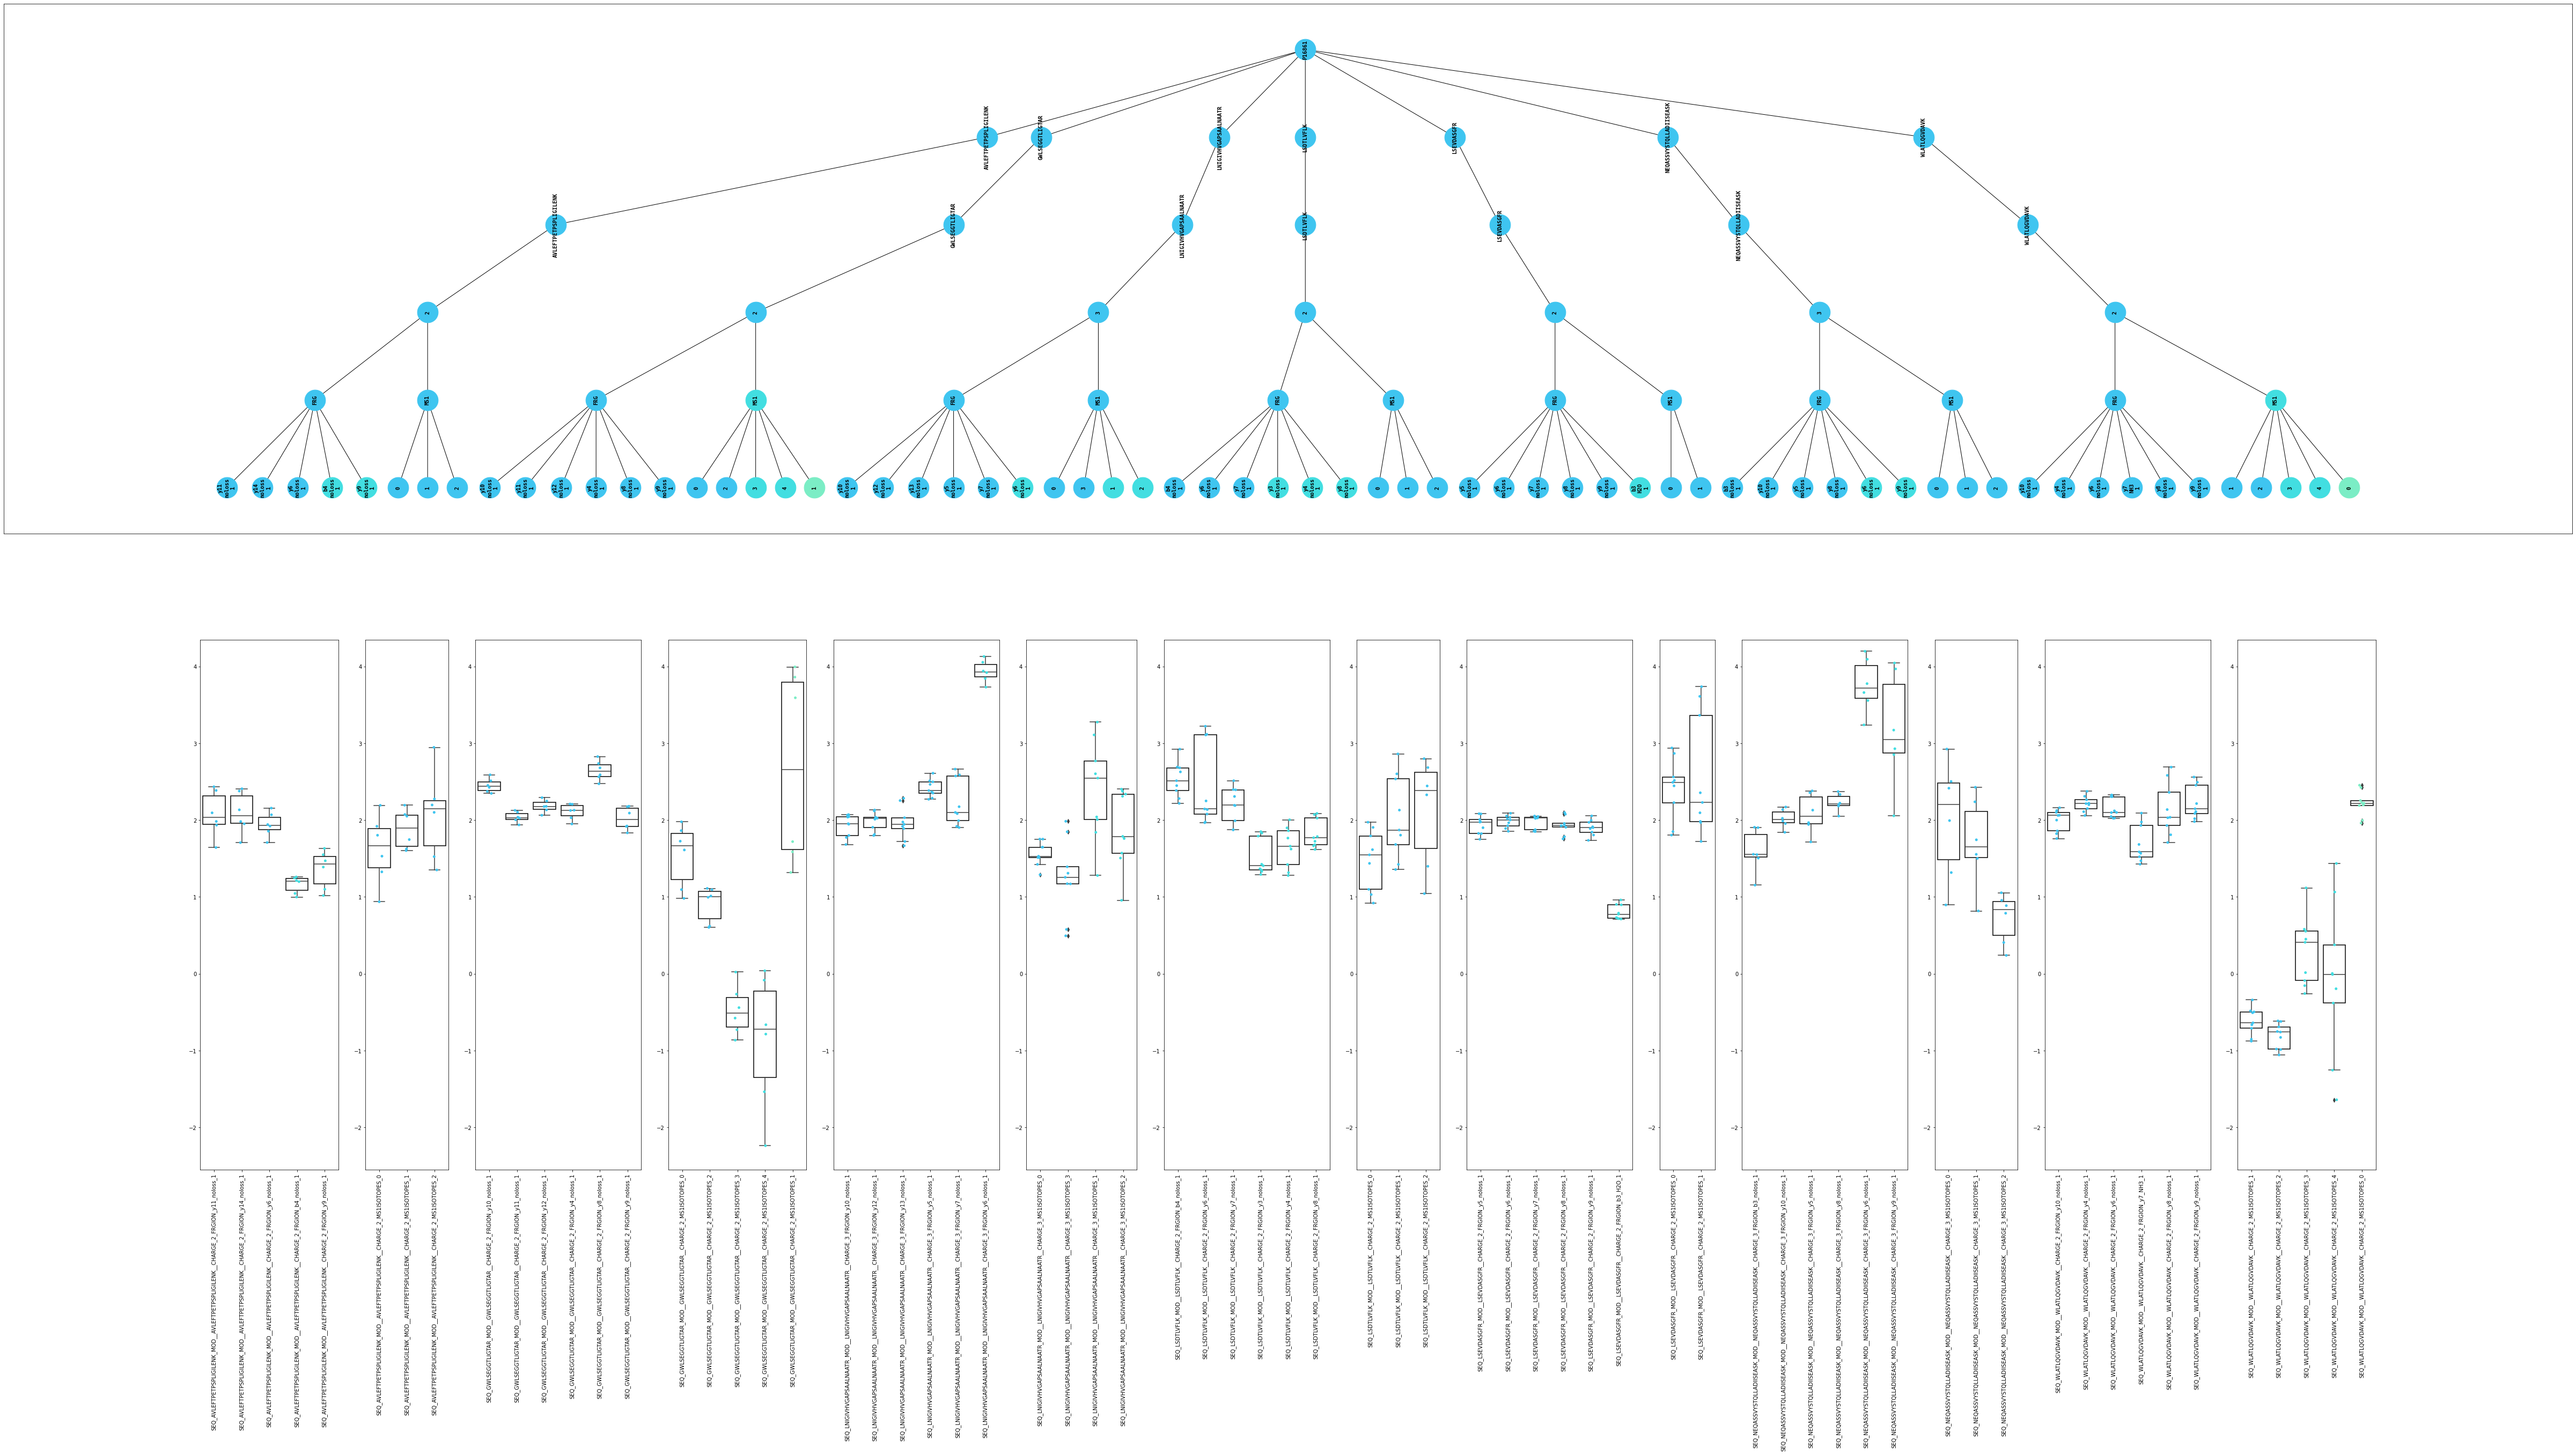

2.14586007093997
2.14586007093997
2.212407423141782
2.237658271447265
1.9812209855751504
2.14702239777872
1.695196059403111
1.8827815726379966
2.14586007093997


In [ ]:
import numpy as np
plotconfig = aq_fcviz.PlotConfig()
plotconfig.colorlist = aq_base_functions.AlphaPeptColorMap().colorlist #change the colorlist to the AlphaPept colorlist, not necessary
plotconfig.parent_level = "gene"
plotconfig.parent_level = "mod_seq_charge"
plotconfig.parent_level = "ion_type"
plotconfig.add_stripplot = True
protein2node = {x.name : x for x in condpair_tree.children}

protein_node = protein2node["P16861"]

combined_plotter = aq_tree_and_fc_viz.CombinedTreeAndFCPlotter(protein_node, quantification_info, plotconfig)
    
print(protein_node.fc)
print(np.median([x.fc for x in protein_node.children]))
for child in  protein_node.children:
    print(child.fc)

In [ ]:
import pandas as pd
import alphaquant.visualizations as aqplot

results_df_aq = pd.read_csv(alphaquant_file, sep = "\t")
results_df_sn = pd.read_excel(spectronaut_file, sheet_name=2)

aqplot.volcano_plot(results_df_aq,log2fc_cutoff=0)
aqplot.volcano_plot(results_df_sn, log2fc_cutoff=0, fdr_header="adjusted.pvalue", fc_header="log2FC", ybound=(0,16))

ModuleNotFoundError: No module named 'alphaquant.visualizations'

In [ ]:
import pandas as pd
proteoform_df = pd.read_csv("./results_houskeeping_protnormed/S1_VS_S2.proteoforms.tsv", sep='\t')
display(proteoform_df)
quality_scores = proteoform_df["quality_score"].to_list()
num_reference_pforms = sum(proteoform_df["is_reference"])
num_all = len(proteoform_df.index)

print((num_all-num_reference_pforms)/num_reference_pforms)

,protein,proteoform_id,cluster,is_reference,peptides,num_peptides,quality_score,log2fc,fraction_of_peptides,fcdiff
0,A0A061ACL3;O76618;Q965I6,A0A061ACL3;O76618;Q965I6_0,0,True,SEQ_VSEYVPEVITYVK_;SEQ_SYLSLDILR_;SEQ_ITNEFFLL...,6,0.016340,-1.382535,1.0,0.0
1,A0A061ACM2;A0A061ACP8;A0A061ADW6;A0A061AJ42;G5...,A0A061ACM2;A0A061ACP8;A0A061ADW6;A0A061AJ42;G5...,0,True,SEQ_LSFNLLAK_,1,0.012626,-1.489337,1.0,0.0
2,A0A061ACR1;F5GUA3;Q22498;Q2XN02,A0A061ACR1;F5GUA3;Q22498;Q2XN02_0,0,True,SEQ_AIVETIIAIIEENPDAK_;SEQ_VVPVTQQALSQPEK_,2,0.014483,-0.932322,1.0,0.0
3,A0A061AD21;A0A061AJI9;C1P640;C1P641;G5EEV6;Q21313,A0A061AD21;A0A061AJI9;C1P640;C1P641;G5EEV6;Q21...,0,True,SEQ_HADDSNPDASFLSAFFGK_;SEQ_LAPVIVSK_;SEQ_ATFA...,5,0.014483,-1.207246,1.0,0.0
4,A0A061AD41;O45228,A0A061AD41;O45228_0,0,True,SEQ_TLDVAEYAIEK_,1,0.010151,-0.921505,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8944,Q9Y6X5,Q9Y6X5_0,0,True,SEQ_KIDDLIGDLVQR_;SEQ_NYEFPHLQNFIK_;SEQ_LLLVSF...,3,0.016340,0.066928,1.0,0.0
8945,Q9Y6X9;Q9Y6X9-2,Q9Y6X9;Q9Y6X9-2_0,0,True,SEQ_TNIVALLQK_;SEQ_DIQMAETSPEGTKPER_;SEQ_LLQPP...,13,0.016340,0.011989,1.0,0.0
8946,Q9Y6Y0,Q9Y6Y0_0,0,True,SEQ_LYIVGGSDPYGQK_;SEQ_VINWVQR_,2,0.014483,0.128119,1.0,0.0
8947,Q9Y6Y8,Q9Y6Y8_0,0,True,SEQ_AHTSSTQLQEELEK_;SEQ_VANQIKEEEEK_;SEQ_EMGIP...,25,0.034908,-0.014218,1.0,0.0


0.037444933920704845


In [ ]:
import alphaquant.utils.diffquant_utils as aq_diffquant_utils

proteoform_df_filtered = aq_diffquant_utils.filter_proteoform_df(proteoform_df=proteoform_df, min_num_peptides=1, fcdiff_cutoff=0)
quality_scores_filtered = proteoform_df_filtered["quality_score"].to_list()

display(proteoform_df_filtered)

proteins_of_interest = set(proteoform_df_filtered["protein"])


,protein,proteoform_id,cluster,is_reference,peptides,num_peptides,quality_score,log2fc,fraction_of_peptides,fcdiff
33,A2RTX5,A2RTX5_1,1,False,SEQ_FADFGVLHR_;SEQ_EILLEMFK_,2,0.031295,-1.158079,0.25,1.181328
35,A3KMH1;A3KMH1-3,A3KMH1;A3KMH1-3_1,1,False,SEQ_LILPSEK_,1,0.001677,3.021547,0.04,3.024507
95,D0PV95,D0PV95_1,1,False,SEQ_GLDIPNVK_,1,0.008941,-0.479897,0.14,0.847896
107,E0AHA7;G5EG85;Q9U9J8;S6FN00,E0AHA7;G5EG85;Q9U9J8;S6FN00_1,1,False,SEQ_LIADINR_,1,0.010804,3.296671,0.33,4.583933
119,G4S034;Q21408,G4S034;Q21408_1,1,False,SEQ_DLIGVQNLIK_,1,0.016393,0.022381,0.14,1.337973
...,...,...,...,...,...,...,...,...,...,...
8816,Q9Y4E5;Q9Y4E5-2,Q9Y4E5;Q9Y4E5-2_0,0,True,SEQ_NAGPVAVAEK_;SEQ_GIAHPISFPSFAK_;SEQ_LCVDQWL...,4,0.016393,-0.154925,0.80,0.000000
8847,Q9Y5A7;Q9Y5A7-2,Q9Y5A7;Q9Y5A7-2_0,0,True,SEQ_TLEEQGVAHNVK_;SEQ_VDNLLQLGFTAQEAR_;SEQ_ACD...,6,0.027453,0.027943,0.86,0.000000
8853,Q9Y5B9,Q9Y5B9_0,0,True,SEQ_EDGELNLMK_;SEQ_MQGSLEAHVNGFR_;SEQ_NEMTAEEK...,64,0.103945,0.056496,0.98,0.000000
8868,Q9Y5P6;Q9Y5P6-2,Q9Y5P6;Q9Y5P6-2_0,0,True,SEQ_IGQNCSIGPNVSLGPGVVVEDGVCIR_;SEQ_SHSWLESCIV...,10,0.027570,0.060132,0.91,0.000000


no normed peptides found for spleen_VS_testis!
no quantfiles found for spleen_VS_testis!


AttributeError: 'NoneType' object has no attribute 'set_index'